In [35]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

In [4]:
df= pd.read_csv("Wine_clustering.csv")

In [36]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,DBSCAN_Cluster,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,-1,-1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,-1,-1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,-1,-1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,-1,-1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,-1,-1


In [37]:
scale=StandardScaler()
data=scale.fit_transform(df)

In [38]:
min_max=MinMaxScaler()
data=min_max.fit_transform(data)

In [39]:
pca=PCA(n_components=2)
data=pca.fit_transform(data)


In [40]:
df=pd.DataFrame(data,columns=['X','Y'])

In [42]:
neighbours=NearestNeighbors(n_neighbors=4)
nbrs=neighbours.fit(df)
dis,ind=nbrs.kneighbors(df)

In [43]:
dis=np.sort(dis,axis=0)

In [44]:
dis=dis[:,-1]

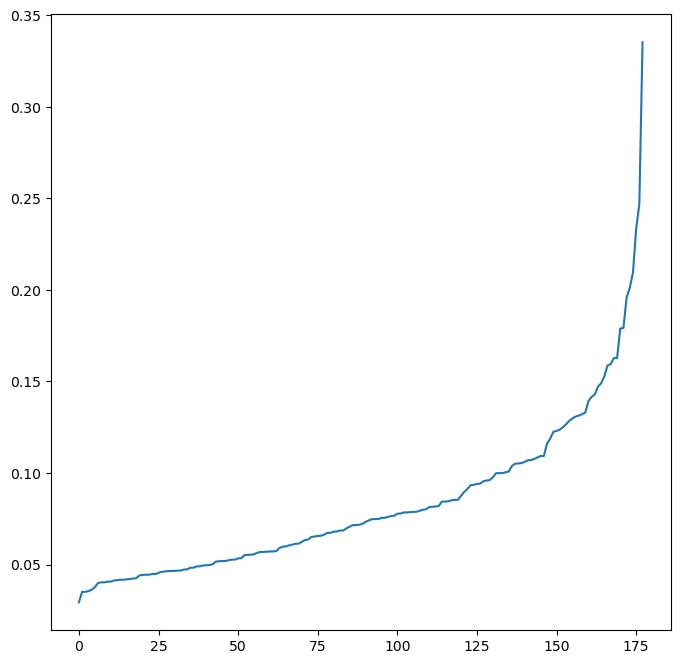

In [45]:
plt.figure(figsize=(8,8))
plt.plot(dis)

In [47]:
cluster=DBSCAN(eps=0.09,min_samples=4)
df['Label']=cluster.fit_predict(df)

<Axes: xlabel='X', ylabel='Y'>

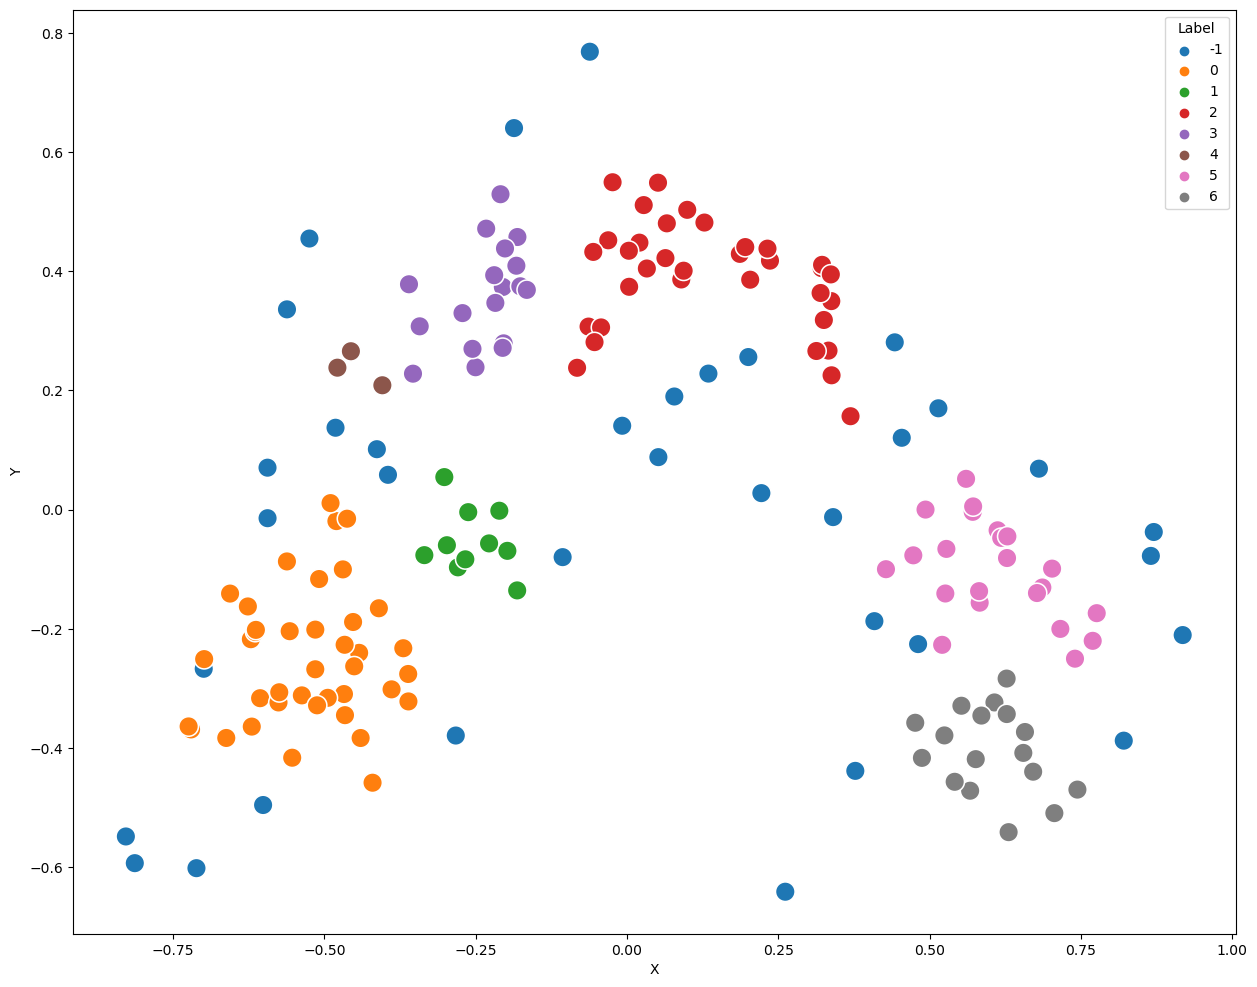

In [49]:
plt.figure(figsize=(15, 12))
sns.scatterplot(x='X',y='Y',data=df,hue='Label',palette='tab10',s=200)

Best parameters for ~6 clusters: eps=0.5, min_samples=3
Actual clusters found: 6

Final clusters found: 6
Noise points: 20


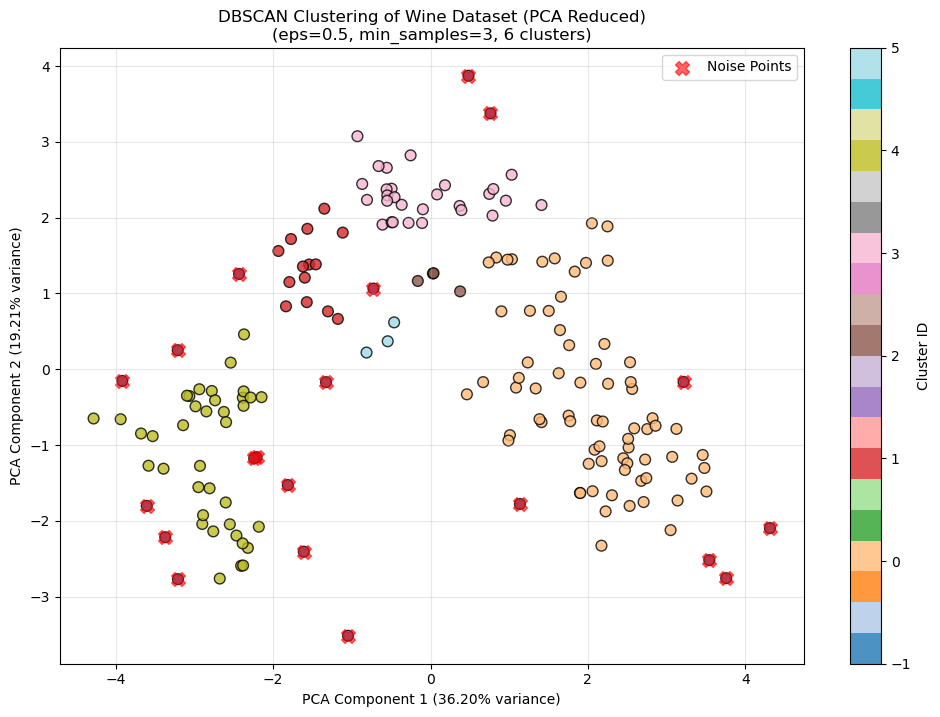


Silhouette Score: 0.273
Interpretation:
0.71+ = Strong structure
0.51-0.70 = Reasonable structure
<0.50 = Weak structure

PCA Component Loadings:

Principal Component 1:
Alcohol: 0.144
Malic_Acid: -0.245
Ash: -0.002
Ash_Alcanity: -0.239
Magnesium: 0.142
Total_Phenols: 0.395
Flavanoids: 0.423
Nonflavanoid_Phenols: -0.299
Proanthocyanins: 0.313
Color_Intensity: -0.089
Hue: 0.297
OD280: 0.376
Proline: 0.287

Principal Component 2:
Alcohol: -0.484
Malic_Acid: -0.225
Ash: -0.316
Ash_Alcanity: 0.011
Magnesium: -0.300
Total_Phenols: -0.065
Flavanoids: 0.003
Nonflavanoid_Phenols: -0.029
Proanthocyanins: -0.039
Color_Intensity: -0.530
Hue: 0.279
OD280: 0.164
Proline: -0.365


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the wine dataset
wine_data = pd.read_csv('wine_clustering.csv')

# Standardize features
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine_data)

# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)

# Function to find DBSCAN parameters that give approximately n clusters
def find_dbscan_params(data, target_clusters, eps_range, min_samples_range):
    best_params = None
    best_cluster_count = 0
    min_diff = float('inf')
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            
            # Skip if no clusters found
            if n_clusters == 0:
                continue
                
            diff = abs(n_clusters - target_clusters)
            
            if diff < min_diff:
                min_diff = diff
                best_params = (eps, min_samples)
                best_cluster_count = n_clusters
                
            if diff == 0:
                return (eps, min_samples), n_clusters
                
    return best_params, best_cluster_count

# Search for parameters that give approximately 6 clusters
eps_range = np.arange(0.5, 2.0, 0.1)
min_samples_range = range(3, 8)
best_params, n_clusters = find_dbscan_params(wine_pca, 6, eps_range, min_samples_range)

print(f"Best parameters for ~6 clusters: eps={best_params[0]:.1f}, min_samples={best_params[1]}")
print(f"Actual clusters found: {n_clusters}")

# Apply DBSCAN with found parameters
dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
cluster_labels = dbscan.fit_predict(wine_pca)

# Cluster analysis
unique_clusters = set(cluster_labels)
n_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)
n_noise = sum(cluster_labels == -1)

print(f"\nFinal clusters found: {n_clusters}")
print(f"Noise points: {n_noise}")

# Enhanced visualization
plt.figure(figsize=(12, 8))
sc = plt.scatter(wine_pca[:,0], wine_pca[:,1],
                c=cluster_labels, cmap='tab20',
                s=60, edgecolor='k', alpha=0.8)

# Highlight noise if exists
if -1 in cluster_labels:
    noise_mask = cluster_labels == -1
    plt.scatter(wine_pca[noise_mask,0], wine_pca[noise_mask,1],
               c='red', marker='X', s=100,
               label='Noise Points', alpha=0.6)
    plt.legend()

plt.colorbar(sc, label='Cluster ID')
plt.xlabel('PCA Component 1 (%.2f%% variance)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PCA Component 2 (%.2f%% variance)' % (pca.explained_variance_ratio_[1]*100))
plt.title(f'DBSCAN Clustering of Wine Dataset (PCA Reduced)\n(eps={best_params[0]:.1f}, min_samples={best_params[1]}, {n_clusters} clusters)')
plt.grid(True, alpha=0.3)
plt.show()

# Quantitative evaluation
if n_clusters > 1:
    sil_score = silhouette_score(wine_pca, cluster_labels)
    print(f"\nSilhouette Score: {sil_score:.3f}")
    print("Interpretation:")
    print("0.71+ = Strong structure\n0.51-0.70 = Reasonable structure\n<0.50 = Weak structure")
else:
    print("\nNeed parameter adjustment - only one cluster found")

# Show PCA component loadings
print("\nPCA Component Loadings:")
for i, component in enumerate(pca.components_):
    print(f"\nPrincipal Component {i+1}:")
    for feature, weight in zip(wine_data.columns, component):
        print(f"{feature}: {weight:.3f}")